In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [2]:
N=100
x_start, x_end= -2.0, 2.0
y_start, y_end= -1.0, 1.0
x=numpy.linspace(x_start, x_end, N)
y=numpy.linspace(y_start, y_end, N)
X,Y= numpy.meshgrid(x,y)

In [3]:
print(X,Y)

[[-2.         -1.95959596 -1.91919192 ...,  1.91919192  1.95959596  2.        ]
 [-2.         -1.95959596 -1.91919192 ...,  1.91919192  1.95959596  2.        ]
 [-2.         -1.95959596 -1.91919192 ...,  1.91919192  1.95959596  2.        ]
 ..., 
 [-2.         -1.95959596 -1.91919192 ...,  1.91919192  1.95959596  2.        ]
 [-2.         -1.95959596 -1.91919192 ...,  1.91919192  1.95959596  2.        ]
 [-2.         -1.95959596 -1.91919192 ...,  1.91919192  1.95959596  2.        ]] [[-1.         -1.         -1.         ..., -1.         -1.         -1.        ]
 [-0.97979798 -0.97979798 -0.97979798 ..., -0.97979798 -0.97979798
  -0.97979798]
 [-0.95959596 -0.95959596 -0.95959596 ..., -0.95959596 -0.95959596
  -0.95959596]
 ..., 
 [ 0.95959596  0.95959596  0.95959596 ...,  0.95959596  0.95959596
   0.95959596]
 [ 0.97979798  0.97979798  0.97979798 ...,  0.97979798  0.97979798
   0.97979798]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]]


In [4]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    u=-strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/(((X-xd)**2+(Y-yd)**2))**2
    v=-strength/(2*math.pi)*2*(X-xd)*(Y-yd)/(((X-xd)**2+(Y-yd)**2))**2
    return u,v

In [5]:
def get_stream_function_doublet(strength, xd, yd, X, Y):
    psi=-strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    return psi

In [6]:
kappa=1.0
x_doublet,y_doublet=0,0

In [7]:
u_doublet, v_doublet=get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)
psi_doublet=get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)

In [8]:
u_inf=1.0
u_freestream= u_inf*numpy.ones((N,N),dtype=float)
v_freestream= numpy.zeros((N,N),dtype=float)
psi_freestream= u_inf*Y

In [9]:
u=u_freestream+u_doublet
v=v_freestream+v_doublet
psi=psi_freestream+psi_doublet

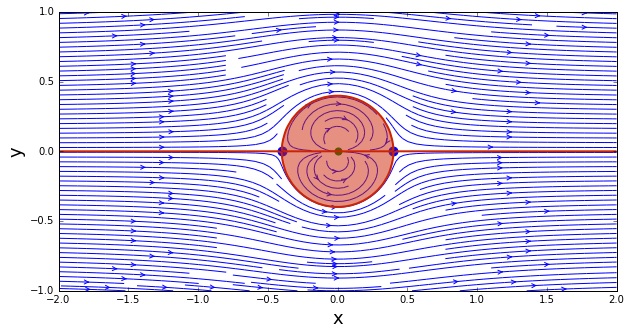

In [10]:
size=10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x',fontsize=18)
pyplot.ylabel('y',fontsize=18)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.streamplot(X,Y,u,v,density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.contour(X,Y,psi, levels=[0.],colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.scatter(x_doublet,y_doublet,color='g',s=50,marker='o')

R = math.sqrt(kappa/(2*math.pi*u_inf))
circle = pyplot.Circle((0, 0), radius=R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)

x_stagnation1,y_stagnation1=-math.sqrt(kappa/(2*math.pi*u_inf)),0
x_stagnation2,y_stagnation2=math.sqrt(kappa/(2*math.pi*u_inf)),0
pyplot.scatter([x_stagnation1,x_stagnation2],[y_stagnation1,y_stagnation2],color='b',s=80,marker='o')

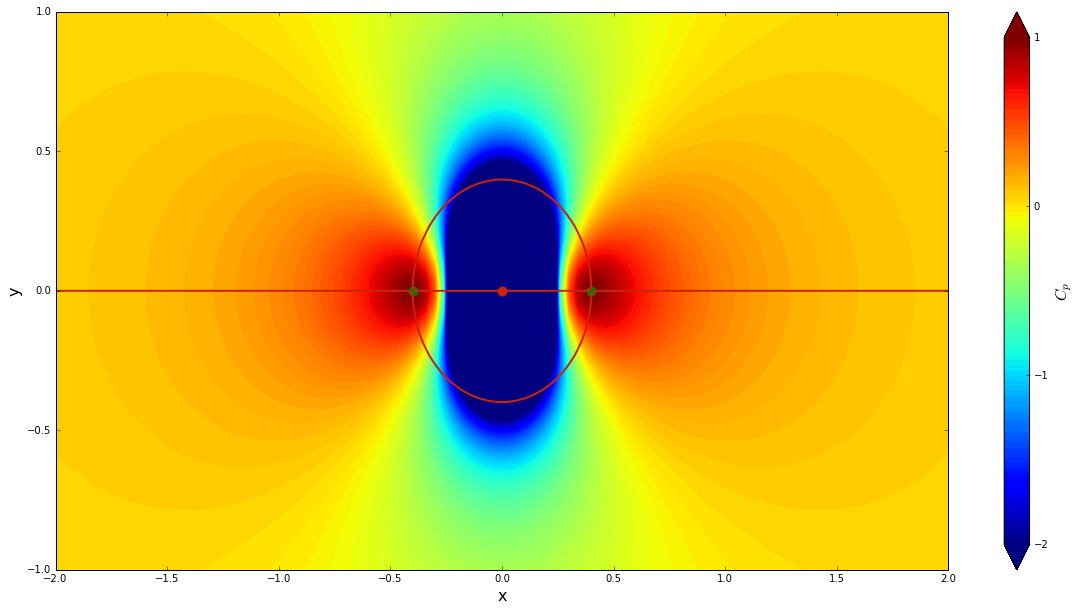

In [11]:
cp = 1.0 - (u**2+v**2)/u_inf**2

# plot the pressure coefficient field
size = 20
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')
pyplot.contour(X,Y,psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.scatter([x_stagnation1, x_stagnation2], [y_stagnation1, y_stagnation2], color='g', s=80, marker='o');

In [12]:
def get_velocity_vortex(strength,xv,yv,X,Y):
    u=strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v=-strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    return u,v

In [13]:
def get_stream_function_vortex(strength, xv,yv,X,Y):
    psi=strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    return psi

In [14]:
gamma=4

In [15]:
x_vortex,y_vortex=0,0

In [16]:
u_vortex,v_vortex=get_velocity_vortex(gamma,0,0,X,Y)
psi_vortex=get_stream_function_vortex(gamma,0,0,X,Y)

In [17]:
u=u_freestream+u_doublet+u_vortex
v=v_freestream+v_doublet+v_vortex
psi=psi_freestream+psi_doublet+psi_vortex


R = math.sqrt(kappa/(2*math.pi*u_inf))
x_stagnation1, y_stagnation1 = +math.sqrt(R**2-(gamma/(4*math.pi*u_inf))**2), -gamma/(4*math.pi*u_inf)
x_stagnation2, y_stagnation2 = -math.sqrt(R**2-(gamma/(4*math.pi*u_inf))**2), -gamma/(4*math.pi*u_inf)

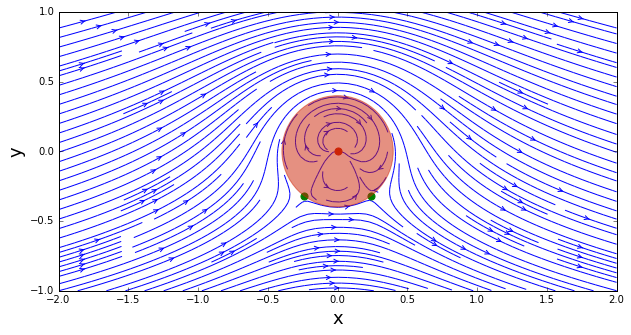

In [18]:
size=10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x',fontsize=18)
pyplot.ylabel('y',fontsize=18)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.streamplot(X,Y,u,v,arrowsize=1,arrowstyle='->',density=2,linewidth=1)
pyplot.scatter(x_vortex,y_vortex,color='#CD2305',s=50,marker='o')
pyplot.scatter([x_stagnation1,x_stagnation2],[y_stagnation1,y_stagnation2],color='g',s=50,marker='o')
circle = pyplot.Circle((0, 0), radius=R, color='#CD2305', alpha=0.5)
pyplot.gca().add_patch(circle)